# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [60]:
# import libraries here
import matplotlib
import pymysql
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

## Connect to DB
# driver   = 'mysql+pymysql:'
# user     = 'data-students' 
# password = 'iR0nH@cK-D4T4B4S3'
# ip       = '34.65.10.136' 
# database = 'temp_states' 

## Connect to local DB
driver   = 'mysql+pymysql:'
user     = 'root' 
password = 'ML_LI_04'
ip       = '127.0.0.1' 
database = 'temp_states' 

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `temp_states`  dataset. 

#### First import it into a dataframe called `temp`.

In [4]:
# your code here

# Check database content
pd.read_sql('SHOW TABLES;', engine)


,Tables_in_temp_states
0,temp_states


#### Print `temp`.

In [5]:
# your code here

temp = pd.read_sql('SELECT * FROM temp_states;', engine)
temp.head(3)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [6]:
# your code here
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
City           7 non-null object
State          7 non-null object
Temperature    7 non-null float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


In [7]:
"""
Dataset with 3 columns indicating the temperature for a City and State.
The dataset includes 7 records.
There are no Null values.
City and State are text fields, while temperature is a float.
"""

'\nDataset with 3 columns indicating the temperature for a City and State.\nThe dataset includes 7 records.\nThere are no Null values.\nCity and State are text fields, while temperature is a float.\n'

#### Select the rows where state is New York.

In [8]:
# your code here
new_york_state = temp.loc[temp['State'] == 'New York']
new_york_state

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average temperature of cities in New York?

In [9]:
# your code here
average_temp_new_york = new_york_state['Temperature'].mean()
average_temp_new_york

10.740740740740724

#### Which states and cities have a temperature above 15 degrees Celsius?

In [10]:
# your code here
temp_above_15 = temp.loc[temp['Temperature'] > 15]
temp_above_15


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [19]:
# your code here
cities_above_15 = list(temp[temp.Temperature > 15].City)
cities_above_15

['NYC', 'Hartford', 'Treton', 'Newark']

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [29]:
# your code here
cities_15_20 = list(temp[(temp.Temperature < 20) & (temp.Temperature > 15)].City)
cities_15_20

['NYC', 'Hartford']

#### Find the mean and standard deviation of the temperature of each state.

In [51]:
# your code here
def get_avg(df):
    return df['Temperature'].mean()

def get_std(df):
    return df['Temperature'].std()

list_states = list(temp.State.unique())
for i in list_states:
    df_state = temp.loc[temp['State'] == i]
    print(i, 'temperature mean is', get_avg(df_state), 'and its standard deviation is', get_std(df_state))

New York temperature mean is 10.740740740740724 and its standard deviation is 8.133404168888033
Connecticut temperature mean is 15.8333333333333 and its standard deviation is 1.964185503295981
New Jersey temperature mean is 21.1111111111111 and its standard deviation is 1.5713484026367568


# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [6]:
## Connect to DB
database2 = 'employees' 

connection_string2 = f'{driver}//{user}:{password}@{ip}/{database2}'
engine2 = create_engine(connection_string2)

# Check database content
pd.read_sql('SHOW TABLES;', engine2)

InternalError: (pymysql.err.InternalError) (1049, "Unknown database 'employees'")
(Background on this error at: http://sqlalche.me/e/2j85)

In [ ]:
# your code here
employees = pd.read_sql('SELECT * FROM employees;', engine2)



#### Explore the data types of the `employees` dataframe. Comment your results.

In [ ]:
# your code here
employees.info()

In [ ]:
employees.head(3)

In [61]:
"""
Dataset with 7 columns that include information about employees from a company.
The dataset includes 9 records.
There are no Null values.
Years and Salary are integer fields, the rest contain text strings. 
"""

'\nDataset with 7 columns that include information about employees from a company.\nThe dataset includes 3 records.\nThere are no Null values.\nYears and Salary are integer fields, the rest contain text strings. \n'

#### What's the average salary in this company?

In [64]:
# your code here
avg_salary = employees.Salary.mean()
avg_salary

48.888888888888886

#### What's the highest salary?

In [65]:
# your code here
max_salary = employees.Salary.max()
max_salary

70

#### What's the lowest salary?

In [67]:
# your code here
min_salary = employees.Salary.min()
min_salary

30

#### Who are the employees with the lowest salary?

In [69]:
# your code here
low_paid_employees = employees[(employees.Salary == min_salary)]
low_paid_employees


,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find all the information about an employee called David.

In [70]:
# your code here
David = employees[(employees.Name == 'David')]
David

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you return only David's salary?

In [1]:
# your code here
David_salary = employees.loc[(employees.Name == 'David'), 'Salary']
David_salary

NameError: name 'employees' is not defined

#### Print all the rows where job title is associate.

In [75]:
# your code here
associates = employees[(employees.Title == 'associate')]
associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [79]:
# Method 1
# your code here
employees_set_1 = employees.iloc[0:3]
employees_set_1

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [81]:
# Method 2
# your code here
employees_set_2 = employees.loc['0':'2']
employees_set_2

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees whose title is associate and whose salary is above 55.

In [82]:
# your code here
that_guy = employees[(employees.Title == 'associate') & (employees.Salary > 55)]
that_guy

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [89]:
# your code here

avg_salary_per_years = employees.groupby('Years').mean()
avg_salary_per_years

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average salary per title?

In [90]:
# your code here
avg_salary_per_years = employees.groupby('Title').mean()
avg_salary_per_years

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


####  Find the salary quartiles.


In [102]:
# your code here
print('First quartile: ', employees.Salary.quantile(0.25))
print('Second quartile: ', employees.Salary.quantile(0.50))
print('Third quartile: ', employees.Salary.quantile(0.75))

First quartile:  35.0
Second quartile:  55.0
Third quartile:  60.0


#### Is the mean salary different per gender?

In [106]:
# your code here
male_salary_mean = employees[(employees.Gender == 'M')].mean()
female_salary_mean = employees[(employees.Gender == 'F')].mean()
print('Mean salary is', male_salary_mean['Salary'],'for men and ', female_salary_mean['Salary'], 'for women.')

Mean salary is 50.0 for men and  47.5 for women.


#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [7]:
# your code here
employees.groupby('Department').describe()

NameError: name 'employees' is not defined

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [8]:
# your code here

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `orders` dataset. Name your dataset `orders`.

In [9]:
# your code here
## Connect to DB
database3 = 'orders' 

connection_string3 = f'{driver}//{user}:{password}@{ip}/{database3}'
engine3 = create_engine(connection_string3)

# Check database content
pd.read_sql('SHOW TABLES;', engine3)

C:\Users\miner\Anaconda3\lib\site-packages\pymysql\cursors.py:170: Warning: (1366, "Incorrect string value: '\\xE1ndar ...' for column 'VARIABLE_VALUE' at row 1")
  result = self._query(query)


,Tables_in_orders
0,orders


In [10]:
# your code here
orders = pd.read_sql('SELECT * FROM orders;', engine3)

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [11]:
# your code here
orders.head(3)

,index,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
index           397924 non-null int64
InvoiceNo       397924 non-null int64
StockCode       397924 non-null object
year            397924 non-null int64
month           397924 non-null int64
day             397924 non-null int64
hour            397924 non-null int64
Description     397924 non-null object
Quantity        397924 non-null int64
InvoiceDate     397924 non-null object
UnitPrice       397924 non-null float64
CustomerID      397924 non-null int64
Country         397924 non-null object
amount_spent    397924 non-null float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [14]:
orders.describe()

,index,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,198961.500000,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,114870.908595,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,99480.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,198961.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,298442.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,397923.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
"""
Dataset of 397924 rows containing information about clients purchases on different dates and countries.
It countains no Null values. Column types seem to correspond the type of values except for the InvoiceDate, which could be
casted to a datetime format.
There seems to be a wide dispersion of the price range in the products, that show a left skewed distribution. There may be some
errors in the dataset even if there are no Null values. For instance, the minimum unit price is 0 (which does not seem correct),
and the maximum quantity bought in one purchase is 80995. Further exploration on these values should be done to understand
if these values can be correct in some context or if they are outliers that need to be discarded.

"""

####  What is the average purchase price?

In [16]:
# your code here
orders.amount_spent.mean()

22.39474850474768

#### What are the highest and lowest purchase prices? 

In [17]:
# your code here
orders.amount_spent.max()

168469.6

In [18]:
orders.amount_spent.min()

0.0

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [48]:
# your code here
spain_customers = orders[orders.Country == 'Spain'].groupby('CustomerID', as_index = False).sum()[['CustomerID', 'amount_spent']]
spain_customers.head(3)


,CustomerID,amount_spent
0,12354,1079.40
1,12417,436.30
2,12421,807.04


#### How many customers do we have in Spain?

In [37]:
# your code here
spain_customers.CustomerID.count()


30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [47]:
# your code here
items_per_customer = orders.groupby('CustomerID', as_index = False).sum()[['CustomerID', 'Quantity']]
customers_over_50_items = items_per_customer[items_per_customer.Quantity > 50].sort_values(by='Quantity')
customers_over_50_items.head(3)


,CustomerID,Quantity
1864,14890,51
2502,15748,51
193,12587,51


#### Select orders from Spain that include more than 50 items.

In [46]:
# your code here
items_per_customer_spain = orders[orders.Country == 'Spain'].groupby('CustomerID', as_index = False).sum()[['CustomerID', 'Quantity']]
spain_customers_over_50_items = items_per_customer_spain[items_per_customer_spain.Quantity > 50].sort_values(by='Quantity')
spain_customers_over_50_items.head(3)

,CustomerID,Quantity
4,12445,62
24,12551,100
6,12450,128


#### Select all free orders.

In [45]:
# your code here
free_orders = orders[orders.amount_spent == 0]
free_orders.head(3)

,index,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,6914,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,22539,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,25379,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [52]:
# your code here
lunch_bag_orders = orders[orders.Description.str.startswith('lunch bag')]
lunch_bag_orders.head(3)

,index,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,172,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,354,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65


#### Select all `lunch bag` orders made in 2011.

In [54]:
# your code here
lunch_bag_orders_2011 = lunch_bag_orders[lunch_bag_orders.year == 2011]
lunch_bag_orders_2011.head(3)

,index,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,26340,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26341,26341,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26512,26512,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.3


#### Show the frequency distribution of the amount spent in Spain.

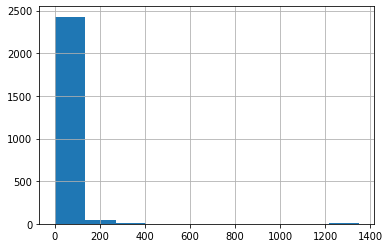

In [61]:
# your code here
spain_orders = orders[orders.Country == 'Spain']
spain_orders.amount_spent.hist()

In [64]:
spain_amount_quantiles = pd.qcut(orders['Country'], 4, retbins=True)
spain_amount_quantiles

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### Select all orders made in the month of August.

In [66]:
# your code here
august_orders = orders[orders.month == 8]
august_orders.head(3)

,index,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,199475,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,199476,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,199477,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [68]:
# your code here
august_orders.Country.value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country?

In [74]:
# your code here
amount_per_country = orders.groupby('Country', as_index = False).mean()[['Country', 'amount_spent']]
amount_per_country.columns = ['Country', 'avg_amount_spent']
amount_per_country.head(3)

,Country,avg_amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824


#### What's the most expensive item?

In [73]:
# your code here
orders.UnitPrice.max()

8142.75

#### What is the average amount spent per year?

In [75]:
# your code here
amount_per_year = orders.groupby('year', as_index = False).mean()[['year', 'amount_spent']]
amount_per_year.columns = ['year', 'avg_amount_spent']
amount_per_year.head(3)

,year,avg_amount_spent
0,2010,21.892733
1,2011,22.430074
